# 어떤 무선 청소기가 인기가 좋을까?

## 1. 데이터 수집

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
driver = webdriver.Chrome('c:/Temp/chromedriver.exe')
url = 'http://search.danawa.com/dsearch.php?k1=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&module=goods&act=dispMain'
driver.get(url)

### 1) 상품정보 가져오기

In [3]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [4]:
prod_item = soup.select('li.prod_item')
len(prod_item)

0

In [5]:
# 1페이지의 무선 청소기 정보가져오기
prod_items = soup.select('ul.product_list > li.prod_item')
len(prod_items)

0

In [6]:
prod_items = soup.select('div.main_prodlist.main_prodlist_list > ul.product_list > li.prod_item')
len(prod_items)

0

In [8]:
title = prod_items[0].select('p.prod_name > a')[0].text.strip()
title

IndexError: list index out of range

In [ ]:
spec_list = prod_items[0].select('div.spec_list')[0].text.strip()
spec_list

In [ ]:
price = prod_items[0].select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(',','')
price

### 2) 상품명 모두 가져오기 

In [ ]:
prod_data = []

for prod_item in prod_items:
    try: # 상품명 가져오기
        title = prod_item.select('p.prod_name > a')[0].text.strip()
    except:
        title = ''
    try: # 스펙 목록 가져오기
        spec_list = prod_item.select('div.spec_list')[0].text.strip()
    except:
        spec_list = ''
    try: # 가격 정보 가져오기 
        price = prod_item.select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(",","")
    except:
        price = 0
    prod_data.append([title, spec_list, price])
    
print(len(prod_data))
print(prod_data)

### 3) 상품 정보 태그에서 원하는 정보 추출 함수 

In [ ]:
def get_prod_items(prod_items):
    prod_data = []
    
    for prod_item in prod_items:
        # 상품명 가져오기
        try:
            title = prod_item.select('p.prod_name > a')[0].text.strip()
        except:
            title = ''
        # 스펙 목록 가져오기
        try: 
            spec_list = prod_item.select('div.spec_list')[0].text.strip()
        except:
            spec_list = ''
        # 가격 정보 가져오기 
        try: 
            price = int(prod_item.select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(",",""))
        except:
            price = 0
        prod_data.append([title, spec_list, price])
        
    return prod_data

## 4) 함수 테스트

In [ ]:
prod_items = soup.select('div.main_prodlist.main_prodlist_list > ul.product_list > li.prod_item')
prod_data = get_prod_items(prod_items)
print(len(prod_data))

### 5) 다나와 사이트 주소 양식

1페이지 http://search.danawa.com/dsearch.php?k1=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&module=goods&act=dispMain

2페이지 http://search.danawa.com/dsearch.php?query=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&originalQuery=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&volumeType=allvs&page=2&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=103740&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2352&defaultVaTab=122136&tab=goods

3페이지 http://search.danawa.com/dsearch.php?query=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&originalQuery=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&previousKeyword=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&volumeType=allvs&page=3&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=103740&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2352&defaultVaTab=122136&tab=goods

In [ ]:
## 검색 기본틀
def get_page_url(keyword, page):
    return 'http://search.danawa.com/dsearch.php?query={}&originalQuery=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&volumeType=allvs&page={}&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=103740&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2352&defaultVaTab=122136&tab=goods'.format(keyword,page)

In [ ]:
keyword = '무선청소기'
page = 8
url = get_page_url(keyword, page)
print(url)

### 6) 주피터 노트북 진행 표시줄 처리

#### 1> tqdm 사용법

In [ ]:
import time
from tqdm.notebook import tqdm

total_page = 10
for page in tqdm(range(1, total_page +1)):
    time.sleep(1)

### 7) 여러페이지에 걸친 상품정보 수집
1. 한페이지의 상품 정보를 수집하는 함수 만들기

2. URL 분석을 통해 원하는 페이지로 이동하는 함수 만들기

In [9]:
import time
from tqdm.notebook import tqdm
from selenium import webdriver
from bs4 import BeautifulSoup

driver = webdriver.Chrome('c:/Temp/chromedriver.exe')
driver.implicitly_wait(3) # 암묵적으로 웹 자원 로드를 위해 3초 기다림

keyword = '무선청소기'
total_page = 10
prod_data_total=[]

def get_page_url(keyword, page):
    return 'http://search.danawa.com/dsearch.php?query={}&originalQuery=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&volumeType=allvs&page={}&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=103740&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2352&defaultVaTab=122136&tab=goods'.format(keyword,page)

def get_prod_items(prod_items):
    prod_data = []
    
    for prod_item in prod_items:
        # 상품명 가져오기
        try:
            title = prod_item.select('p.prod_name > a')[0].text.strip()
        except:
            title = ''
        # 스펙 목록 가져오기
        try: 
            spec_list = prod_item.select('div.spec_list')[0].text.strip()
        except:
            spec_list = ''
        # 가격 정보 가져오기 
        try: 
            price = int(prod_item.select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(",",""))
        except:
            price = 0
        prod_data.append([title, spec_list, price])
        
    return prod_data


for page in tqdm(range(1, total_page +1)):
    url = get_page_url(keyword, page)
    driver.get(url)
    time.sleep(5)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    prod_items = soup.select('div.main_prodlist.main_prodlist_list > ul.product_list > li.prod_item')
    prod_list = get_prod_items(prod_items)
    
    prod_data_total = prod_data_total + prod_list
    

## 8) 수집 데이터 저장

In [10]:
import pandas as pd
data = pd.DataFrame(prod_data_total)
data.columns = ['상품명','스펙 목록','가격']
df = data.drop(data[data['스펙 목록'].map(len) < 40].index) ## 수집 데이터 중 40글자 미만인 데이터 삭제
df

,상품명,스펙 목록,가격
0,샤오미 드리미 V10,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 25.2V / 헤파필터 / H...,148080
1,LG전자 코드제로 A9S A9700,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 헤파필터 / 2중터보싸이클론 / 5단...,1001200
3,삼성전자 제트 VS20T9213QDCS,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 21.6V / 헤파필터 / 싸...,663400
4,다이슨 V10 카본파이버,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 25.2V / 싸이클론 / 흡...,597100
5,LG전자 코드제로 A9S A9570,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 헤파필터 / 2중터보싸이클론 / 5단...,919000
...,...,...,...
405,키친아트 렉스 차량용 진공청소기 PK901,"차량용청소기 / 무선 / 12V / 흡입력: 5,000Pa / 최대출력: 120W ...",55000
406,저스트원 SN-XR330V,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 11.1V / 헤파필터 / 2...,52100
407,스위스밀리터리 SMA-SP22,물걸레청소기 / 스틱형 / 회전식 / 무선형 / 전압: 14.8V / 충전시간: 4...,186300
408,무궁화전자 MHC-720,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 헤파필터 / H12급 / 3단계여과 ...,71200


In [11]:
df.to_excel('./files/danawa_crawling.xlsx', index=False)

# 다나와 크롤링 데이터 전처리
1. 상품명 데이터에서 회사명과 제품명 분리

2. 일반 문자열로 저장된 스펙 목록을 필요한 스펙으로 분류 및 단위 통합


In [12]:
import pandas as pd
data = pd.read_excel('./files/danawa_crawling.xlsx')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     400 non-null    object
 1   스펙 목록   400 non-null    object
 2   가격      400 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


,상품명,스펙 목록,가격
0,샤오미 드리미 V10,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 25.2V / 헤파필터 / H...,148080
1,LG전자 코드제로 A9S A9700,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 헤파필터 / 2중터보싸이클론 / 5단...,1001200
2,삼성전자 제트 VS20T9213QDCS,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 21.6V / 헤파필터 / 싸...,663400
3,다이슨 V10 카본파이버,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 25.2V / 싸이클론 / 흡...,597100
4,LG전자 코드제로 A9S A9570,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 헤파필터 / 2중터보싸이클론 / 5단...,919000


## 1.상품명 데이터에서 회사명과 제품명 분리

In [13]:
data['상품명'][:10]

0                           샤오미 드리미 V10
1                   LG전자 코드제로 A9S A9700
2                 삼성전자 제트 VS20T9213QDCS
3                         다이슨 V10 카본파이버
4                   LG전자 코드제로 A9S A9570
5    샤오미 CLEANFLY 차량용 무선 청소기 3세대 (해외구매)
6                   삼성전자 제트 VS15R8500BF
7                 삼성전자 제트 VS20T9258SDCS
8              일렉트로룩스 WELL Q6 WQ61-1OGG
9                   삼성전자 제트 VS20R9078S2
Name: 상품명, dtype: object

In [14]:
title = "LG전자 코드제로 A9S A9700"
info = title.split(' ',1) ## 첫번째 공백만 split 해서 나타내기
print(info)

['LG전자', '코드제로 A9S A9700']


In [15]:
company_list = []
product_list = []
for title in data['상품명']:
    title_info = title.split(' ',1)
    company_name = title_info[0]
    product_name = title_info[1]
    company_list.append(company_name)
    product_list.append(product_name)    

In [16]:
print(len(data))
print(len(company_list))
print(company_list[:5])
print(len(product_list))
print(product_list[:5])

400
400
['샤오미', 'LG전자', '삼성전자', '다이슨', 'LG전자']
400
['드리미 V10', '코드제로 A9S A9700', '제트 VS20T9213QDCS', 'V10 카본파이버', '코드제로 A9S A9570']


## 2. 스펙 목록 데이터 살펴보기

In [17]:
data['스펙 목록'][0]

'핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 25.2V / 헤파필터 / H12급 / 5단계여과 / 흡입력: 140AW / 흡입력: 22000Pa / 먼지통용량: 0.5L / 충전시간: 3시간30분 / 사용시간: 1시간 / 용량: 2500mAh / 구성: 바닥, 침구, 솔형, 틈새, 연장툴, 거치대 / 무게: 1.5kg / 색상:화이트 / 소비전력: 450W'

In [18]:
data['스펙 목록'][0].split(' / ')

['핸디/스틱청소기',
 '핸디+스틱형',
 '무선형',
 '전압: 25.2V',
 '헤파필터',
 'H12급',
 '5단계여과',
 '흡입력: 140AW',
 '흡입력: 22000Pa',
 '먼지통용량: 0.5L',
 '충전시간: 3시간30분',
 '사용시간: 1시간',
 '용량: 2500mAh',
 '구성: 바닥, 침구, 솔형, 틈새, 연장툴, 거치대',
 '무게: 1.5kg',
 '색상:화이트',
 '소비전력: 450W']

## 3. 스펙목록에서 카테고리, 사용시간, 흡입력을 추출해서 정리

In [19]:
spec_list = data['스펙 목록'][0].split(' / ')
spec_list

['핸디/스틱청소기',
 '핸디+스틱형',
 '무선형',
 '전압: 25.2V',
 '헤파필터',
 'H12급',
 '5단계여과',
 '흡입력: 140AW',
 '흡입력: 22000Pa',
 '먼지통용량: 0.5L',
 '충전시간: 3시간30분',
 '사용시간: 1시간',
 '용량: 2500mAh',
 '구성: 바닥, 침구, 솔형, 틈새, 연장툴, 거치대',
 '무게: 1.5kg',
 '색상:화이트',
 '소비전력: 450W']

In [20]:
category = spec_list[0]
category

'핸디/스틱청소기'

In [21]:
for spec in spec_list:
    if '사용시간' in spec:
        use_time_spec = spec
    elif '흡입력' in spec:
        suction_spec = spec
        
print(use_time_spec)
print(suction_spec)

사용시간: 1시간
흡입력: 22000Pa


In [22]:
use_time_value = use_time_spec.split(' ')[1].strip()
suction_value = suction_spec.split(' ')[1].strip()

print(use_time_value)
print(suction_value)

1시간
22000Pa


In [23]:
category_list = []
use_time_list = []
suction_list = []

for spec_data in data['스펙 목록']:
    spec_list = spec_data.split(' / ')
    
    category = spec_list[0]
    category_list.append(category)
    
    use_time_value = None
    suction_value = None

    for spec in spec_list:
        if '사용시간' in spec:
            use_time_value = spec.split(' ')[1].strip()
        elif '흡입력' in spec:
            suction_value = spec.split(' ')[1].strip()
            
    use_time_list.append(use_time_value)
    suction_list.append(suction_value)

In [24]:
print('카테고리',len(category_list),category_list[:5])
print('사용시간',len(use_time_list),use_time_list[:5])
print('흡입력',len(suction_list),suction_list[:5])

카테고리 400 ['핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기']
사용시간 400 ['1시간', '2시간', '1시간', '1시간', '2시간']
흡입력 400 ['22000Pa', '200W', '200W', '160AW', '200W']


## 4. 단위 시간 통일시키기

In [25]:
use_time_list

['1시간',
 '2시간',
 '1시간',
 '1시간',
 '2시간',
 '25분',
 '40분',
 '2시간',
 '45분',
 '2시간',
 '40분',
 '45분',
 '1시간',
 '40분',
 '20분',
 '48분',
 '40분',
 '42분',
 '1시간',
 '30분',
 '23분',
 '30분',
 '1시간40분',
 '30분',
 '1시간',
 '30분',
 '28분',
 '2시간',
 '53분',
 '1시간',
 '1시간30분',
 '9~30분',
 '2시간',
 '50분',
 '1시간40분',
 '1시간',
 '2시간',
 '40분',
 '1시간10분',
 '35분',
 '1시간',
 '120분',
 '50분',
 '20분',
 '30분',
 '50분',
 '60분',
 '1시간',
 '2시간',
 '1시간40분',
 '53분',
 '1시간',
 '50분',
 '45분',
 '40분',
 '30분',
 '25분',
 '30분',
 '40분',
 '45분',
 '40분',
 '20분',
 '42분',
 '35분',
 '24분',
 '30분',
 None,
 '1시간',
 '1시간',
 '12분',
 '50분',
 '30분',
 '40분',
 '20분',
 '1시간',
 '30분',
 '40분',
 '60분',
 '50분',
 '2시간',
 '1시간20분',
 '50분',
 '25분',
 '120분',
 '1시간20분',
 '13분',
 '1시간',
 '50분',
 '50분',
 '50분',
 '2시간',
 '20분',
 '2시간',
 None,
 '5~10분',
 '50분',
 '5시간',
 '42분',
 '80분',
 '2시간',
 '30분',
 '80분',
 '30분',
 '1시간20분',
 '1시간',
 '1시간',
 '35분',
 '40분',
 None,
 '40분(강),',
 '1시간',
 '40분',
 '1시간',
 '80분',
 '50분',
 '30분',
 '1시간',
 '40분',
 '40분',
 '80분',
 '1시간',
 

In [26]:
def convert_time_minute(time):
    try :
        if '시간' in time:
            hour = time.split('시간')[0]
            if '분' in time:
                minute = time.split('시간')[-1].split('분')[0]
            else :
                minute = 0
        else:
            hour = 0
            minute = time.split('분')[0]
        return int(hour)*60 + int(minute)
    except:
        return None

In [27]:
# 함수 테스트
times = ['40분', '4분','1시간','3시간30분','4시간']
for time in times:
    time_value = convert_time_minute(time)
    print(time, '=', time_value)

40분 = 40
4분 = 4
1시간 = 60
3시간30분 = 210
4시간 = 240


In [28]:
new_use_time_list = []
for time in use_time_list:
    value = convert_time_minute(time)
    new_use_time_list.append(value)

In [29]:
print(len(new_use_time_list))
print(new_use_time_list[:10])

400
[60, 120, 60, 60, 120, 25, 40, 120, 45, 120]


## 5. 단위 흡입력 통일시키기

In [30]:
def get_suction(value):
    try:
        value = value.upper()
        if "AW" in value or "W" in value:
            result = value.replace("A", "").replace("W","")
            result = int(result.replace(",",""))
        elif "PA" in value:
            result = value.replace("PA","")
            result = int(result.replace(",",""))/100
        else:
            result = None
        return result
    except:
        return None

In [31]:
# 함수 테스트
suction_list2 = ['100W','10AW','10,000Pa']
for power in suction_list2:
    value = get_suction(power)
    print(power,value)

100W 100
10AW 10
10,000Pa 100.0


In [32]:
new_suction_list = []
for power in suction_list:
    value = get_suction(power)
    new_suction_list.append(value)

In [33]:
print(len(new_suction_list))
print(new_suction_list[:10])

400
[220.0, 200, 200, 160, 200, 168.0, 150, 200, None, 200]


## 6. 전처리 결과 엑셀 저장

In [34]:
pd_data = pd.DataFrame()
pd_data['카테고리'] = category_list
pd_data['회사명'] = company_list
pd_data['제품'] = product_list
pd_data['가격'] = data['가격']
pd_data['사용시간'] = new_use_time_list
pd_data['흡입력'] = new_suction_list
pd_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,샤오미,드리미 V10,148080,60.0,220.0
1,핸디/스틱청소기,LG전자,코드제로 A9S A9700,1001200,120.0,200.0
2,핸디/스틱청소기,삼성전자,제트 VS20T9213QDCS,663400,60.0,200.0
3,핸디/스틱청소기,다이슨,V10 카본파이버,597100,60.0,160.0
4,핸디/스틱청소기,LG전자,코드제로 A9S A9570,919000,120.0,200.0


In [35]:
pd_data['카테고리'].value_counts()

핸디/스틱청소기          312
물걸레청소기             44
차량용청소기             20
욕실청소기               8
업소용청소기              6
핸디/스틱청소기+로봇청소기      4
침구청소기               4
진공청소기               1
로봇청소기               1
Name: 카테고리, dtype: int64

In [38]:
pd_data_final = pd_data[pd_data['카테고리'].isin(['핸디/스틱청소기'])]
len(pd_data_final)

312

In [39]:
pd_data_final.to_excel('./files/danawa_data_final.xlsx', index=False)

# 무선청소기 모델별 비교 분석

In [1]:
import pandas as pd
danawa_data = pd.read_excel('./files/danawa_data_final.xlsx')
danawa_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,샤오미,드리미 V10,148080,60.0,220.0
1,핸디/스틱청소기,LG전자,코드제로 A9S A9700,1001200,120.0,200.0
2,핸디/스틱청소기,삼성전자,제트 VS20T9213QDCS,663400,60.0,200.0
3,핸디/스틱청소기,다이슨,V10 카본파이버,597100,60.0,160.0
4,핸디/스틱청소기,LG전자,코드제로 A9S A9570,919000,120.0,200.0


## 1. 흡입력 내림차순

In [2]:
top_list = danawa_data.sort_values(['흡입력'],ascending = False)
top_list

,카테고리,회사명,제품,가격,사용시간,흡입력
141,핸디/스틱청소기,리하스,LH20,259000,120.0,330.0
44,핸디/스틱청소기,캐치웰,NEW F8,199000,25.0,290.0
185,핸디/스틱청소기,퍼피유,T12R,393530,60.0,290.0
125,핸디/스틱청소기,샤오미,드리미 V12,337160,90.0,270.0
119,핸디/스틱청소기,아이룸,RS7,174160,NaN,260.0
...,...,...,...,...,...,...
306,핸디/스틱청소기,테팔,엑스퍼트 3.60 TY6974,261630,45.0,NaN
308,핸디/스틱청소기,삼성전자,VC-H70S,83870,NaN,NaN
309,핸디/스틱청소기,일렉트로룩스,ZB6106,56090,14.0,NaN
310,핸디/스틱청소기,저스트원,SN-XR330V,52100,30.0,NaN


## 2. 사용시간 내림차순

In [3]:
top_list = danawa_data.sort_values(['사용시간'],ascending = False)
top_list

,카테고리,회사명,제품,가격,사용시간,흡입력
296,핸디/스틱청소기,삼성전자,제트 VS20T9279S6,745920,120.0,200.0
72,핸디/스틱청소기,삼성전자,제트 VS20T9278S3,798930,120.0,200.0
159,핸디/스틱청소기,삼성전자,제트 VS20T9257SECS,792570,120.0,200.0
33,핸디/스틱청소기,삼성전자,제트 VS20R9074S2,581830,120.0,200.0
149,핸디/스틱청소기,삼성전자,제트 VS20T9258SF,939250,120.0,200.0
...,...,...,...,...,...,...
278,핸디/스틱청소기,리락쿠마,미니미니 청소기,5720,NaN,NaN
293,핸디/스틱청소기,유니맥스,UVC-1686A,30510,NaN,NaN
301,핸디/스틱청소기,DIBEA,ALLNEW12000,123900,NaN,120.0
302,핸디/스틱청소기,아이룸,AST-009 플러스 맥스,117950,NaN,120.0


## 3. 흡입력, 사용시간 내림차순

In [4]:
top_list = danawa_data.sort_values(['사용시간','흡입력'],ascending = False)
top_list

,카테고리,회사명,제품,가격,사용시간,흡입력
141,핸디/스틱청소기,리하스,LH20,259000,120.0,330.0
1,핸디/스틱청소기,LG전자,코드제로 A9S A9700,1001200,120.0,200.0
4,핸디/스틱청소기,LG전자,코드제로 A9S A9570,919000,120.0,200.0
6,핸디/스틱청소기,삼성전자,제트 VS20T9258SDCS,899000,120.0,200.0
8,핸디/스틱청소기,삼성전자,제트 VS20R9078S2,646910,120.0,200.0
...,...,...,...,...,...,...
262,핸디/스틱청소기,듀플렉스,DP-480VC,24420,NaN,NaN
272,핸디/스틱청소기,코코젤리,GNOVC2,135590,NaN,NaN
278,핸디/스틱청소기,리락쿠마,미니미니 청소기,5720,NaN,NaN
293,핸디/스틱청소기,유니맥스,UVC-1686A,30510,NaN,NaN


## 4. 가성비 좋은 제품 살펴보기

In [6]:
price_mean_value = danawa_data['가격'].mean()
suction_mean_value = danawa_data['흡입력'].mean()
use_time_mean_value = danawa_data['사용시간'].mean()
print("가격 평균값", price_mean_value)
print("흡입력 평균값", suction_mean_value)
print("사용시간 평균값", use_time_mean_value)

가격 평균값 384529.8717948718
흡입력 평균값 167.0603015075377
사용시간 평균값 49.75778546712803


## 5. 평균보다 높은 제품 찾아보기

In [9]:
condition_data = danawa_data[
    (danawa_data['가격'] <= price_mean_value) &
    (danawa_data['흡입력'] >= suction_mean_value) &
    (danawa_data['사용시간'] >= use_time_mean_value)]

condition_data

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,샤오미,드리미 V10,148080,60.0,220.0
23,핸디/스틱청소기,샤오미,SHUNZAO Z11,159000,60.0,260.0
24,핸디/스틱청소기,샤오미,드리미 V11,235500,90.0,250.0
26,핸디/스틱청소기,DIBEA,PLA25,226590,50.0,250.0
30,핸디/스틱청소기,델로라,V11 파워 300W,137600,70.0,220.0
36,핸디/스틱청소기,샤오미,드리미 V9,122000,60.0,200.0
54,핸디/스틱청소기,샤오미,SHUNZAO Z11 PRO,214410,60.0,260.0
57,핸디/스틱청소기,아이닉,i20,238000,50.0,250.0
60,핸디/스틱청소기,샤오미,드리미 V10P,237360,60.0,220.0
70,핸디/스틱청소기,DIBEA,X20,229000,50.0,200.0


# 데이터 시각화

### 1. 라이브러리 임포트 및 한글 글꼴 설정

In [10]:
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform

font_path = ''
if platform.system() == 'Windows': 
    font_path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = font_path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf'
    rc('font', family = 'AppleGothic')
else: 
    print('Check your OS system')
    
%matplotlib inline

## 2. 결측값 제거하기

In [16]:
chart_data = danawa_data.dropna(axis='index')
len(chart_data)

192

## 3. 흡입력, 사용시간의 최대/최소값 정리

In [18]:
suction_max_value = chart_data['흡입력'].max()
suction_mean_value = chart_data['흡입력'].mean()
use_time_max_value = chart_data['사용시간'].max()
use_time_mean_value = chart_data['사용시간'].mean()

## 4. 청소기 성능 시각화

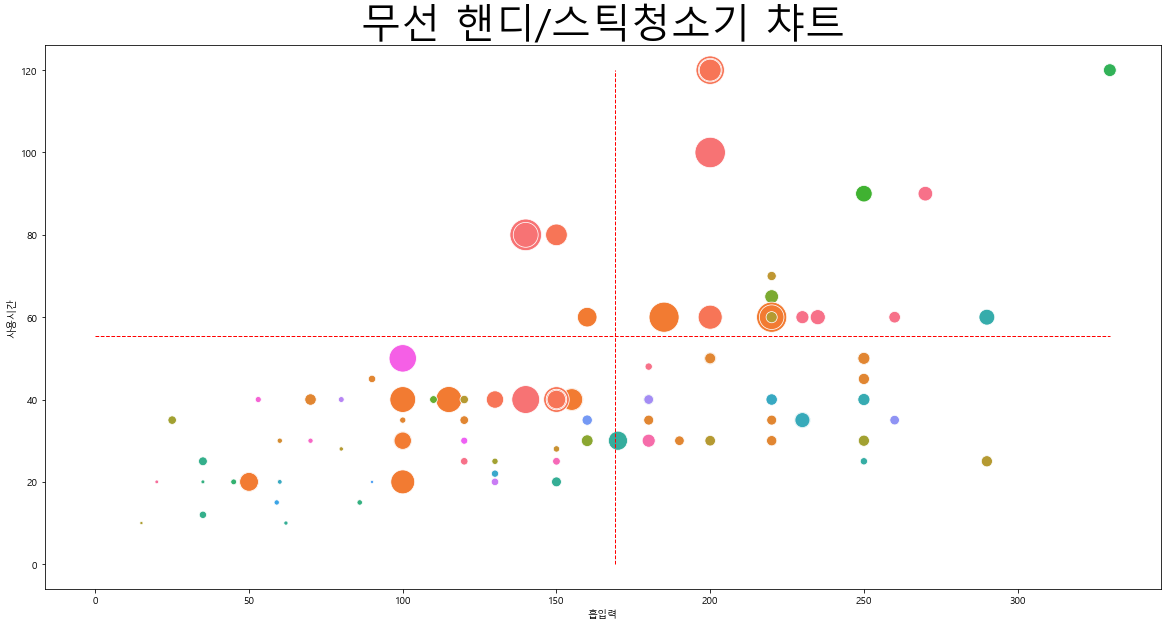

In [24]:
plt.figure(figsize=(20,10))
plt.title('무선 핸디/스틱청소기 챠트',fontsize=40)
sns.scatterplot(x='흡입력',y='사용시간',size='가격',hue= chart_data['회사명'],data=chart_data,sizes=(10,1000),legend=False)
plt.plot([0,suction_max_value],
        [use_time_mean_value, use_time_mean_value],
        'r--',
        lw = 1)
plt.plot([suction_mean_value, suction_mean_value],
         [0,use_time_max_value],
        'r--',
        lw = 1)
plt.show()

## 5. 인기제품 20개 데이터 시각화

In [30]:
chart_data_selected = chart_data[:20]
len(chart_data_selected)
print(chart_data_selected)

        카테고리      회사명                   제품       가격   사용시간    흡입력
0   핸디/스틱청소기      샤오미              드리미 V10   148080   60.0  220.0
1   핸디/스틱청소기     LG전자       코드제로 A9S A9700  1001200  120.0  200.0
2   핸디/스틱청소기     삼성전자     제트 VS20T9213QDCS   663400   60.0  200.0
3   핸디/스틱청소기      다이슨            V10 카본파이버   597100   60.0  160.0
4   핸디/스틱청소기     LG전자       코드제로 A9S A9570   919000  120.0  200.0
5   핸디/스틱청소기     삼성전자       제트 VS15R8500BF   386270   40.0  150.0
6   핸디/스틱청소기     삼성전자     제트 VS20T9258SDCS   899000  120.0  200.0
8   핸디/스틱청소기     삼성전자       제트 VS20R9078S2   646910  120.0  200.0
9   핸디/스틱청소기      다이슨               V8 플러피   395120   40.0  155.0
10  핸디/스틱청소기    DIBEA           TSX-25000A   199000   45.0  250.0
11  핸디/스틱청소기     LG전자       코드제로 A9S A9300   725820   60.0  200.0
13  핸디/스틱청소기      다이슨        옴니 글라이드 컴플리트+   581950   20.0   50.0
14  핸디/스틱청소기      샤오미  TROUVER TECH SOLO10    89500   48.0  180.0
15  핸디/스틱청소기      다이슨          디지털 슬림 플러피+   709880   40.0  100.0
17  핸디/스틱청

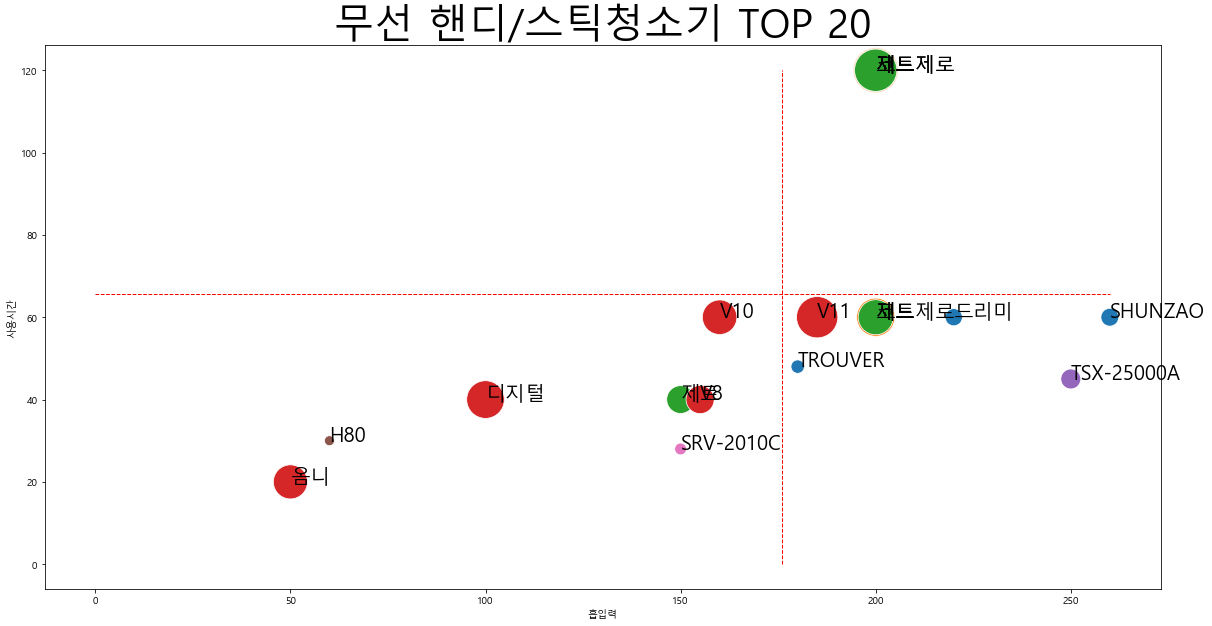

In [29]:
suction_max_value = chart_data_selected['흡입력'].max()
suction_mean_value = chart_data_selected['흡입력'].mean()
use_time_max_value = chart_data_selected['사용시간'].max()
use_time_mean_value = chart_data_selected['사용시간'].mean()

plt.figure(figsize=(20,10))
plt.title('무선 핸디/스틱청소기 TOP 20',fontsize=40)

sns.scatterplot(x='흡입력',
                y='사용시간',
                size='가격',
                hue= chart_data_selected['회사명'],
                data=chart_data_selected,
                sizes=(100,2000),
                legend=False)

plt.plot([0,suction_max_value],
        [use_time_mean_value, use_time_mean_value],
        'r--',
        lw = 1)
plt.plot([suction_mean_value, suction_mean_value],
         [0,use_time_max_value],
        'r--',
        lw = 1)

for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x,y,s,size=20)    
    
plt.show()